In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

In [91]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [92]:
LI = load_iris()
print(LI.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [93]:
df_full = pd.DataFrame(LI.data, columns=LI.feature_names)
df_full['variety'] = LI.target
df = df_full.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'variety']]

In [94]:
df_full.head(100)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
95                5.7               3.0                4.2               1.2   
96                5.7               2.9                4.2               1.3   
97                6.2               2.9                4.3               1.3   
98                5.1               2.5                3.0               1.1   
99                5.7               2.8                4.1               1.3   

    variety  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
95        1  
96        1  
97        1  
98        1  
99        1  

[100 rows x 5 columns]

In [95]:
df_train, df_test = train_test_split(df, test_size=0.2)
y_train, y_test = df_train['variety'], df_test['variety']

In [96]:
del df_train['variety']
del df_test['variety']

In [97]:
lda = LinearDiscriminantAnalysis()
lda.fit(df_train, y_train)

LinearDiscriminantAnalysis()

In [98]:
lda.predict(df_test)

array([1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2,
       1, 2, 0, 2, 0, 1, 1, 1])

In [99]:
result = pd.DataFrame([y_test.values, lda.predict(df_test)]).T

In [100]:
result.head()

0  1
0  1  1
1  1  1
2  1  1
3  1  1
4  1  2

In [114]:
small_train = df_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = df_test[(y_test == 0) |(y_train == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_train == 1) | (y_test == 2)]
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)


<ipython-input-114-eb5d1a012e58>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  small_test = df_test[(y_test == 0) |(y_train == 1) | (y_test == 2)]


LinearDiscriminantAnalysis()

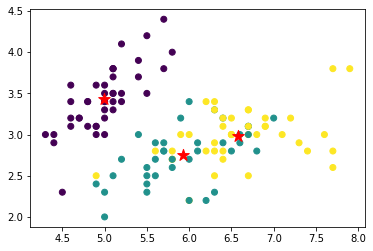

In [115]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.show()

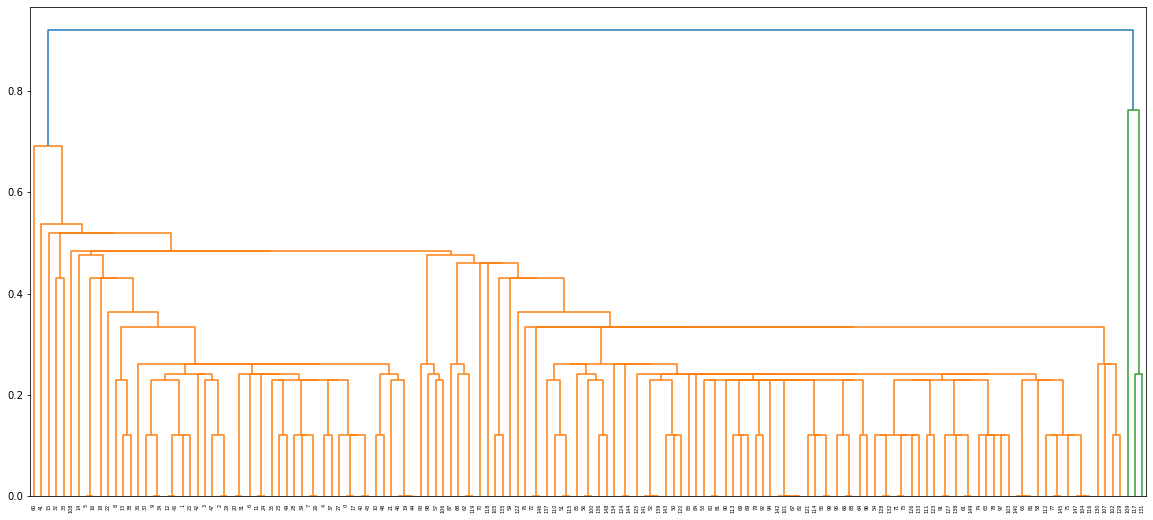

In [167]:
df1 = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
distance_mat = pdist(X_scaled) # pdist посчитает нам верхний треугольник матрицы попарных расстояний
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z, color_threshold=0.8)

In [169]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

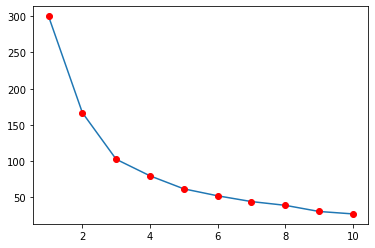

In [177]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

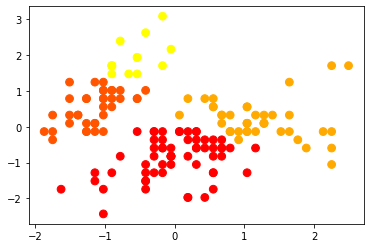

In [179]:
aglo = AgglomerativeClustering(n_clusters=4)
clusters = aglo.fit_predict(X_scaled)
clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

# Небольшой вывод:
## По-большому счёту здесь можно предположить наличие 4х кластеров , однако из-за малого размера 4го лучше всё-таки использовать 3 



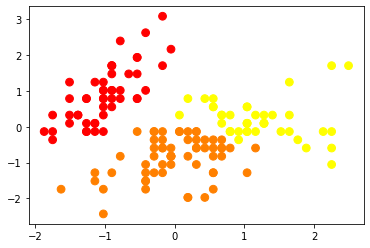

In [185]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)